In [1]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from time import time
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sb
import pandas as pd
import os

from RTER import RegressionTree
from distribution import TestDistribution
from ensemble import RegressionTreeBoosting, RegressionTreeEnsemble

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


## Partition Illustration

(-1.0, 2.0)

(-1.0, 2.0)

([], [])

([], [])

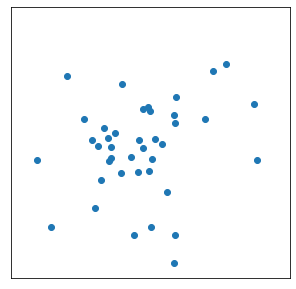

In [2]:
np.random.seed(2)
num = 40
fig = plt.figure(figsize=(5,5))
X = np.random.normal(loc = 0.5, scale = 0.5, size = num)
Y = np.random.normal(loc = 0.5, scale = 0.5, size = num)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.scatter(X,Y)
plt.xticks([])
plt.yticks([])
plt.savefig("./results/plot/partition_0.pdf",bbox_inches="tight")


(-1.0, 2.0)

(-1.0, 2.0)

([], [])

([], [])

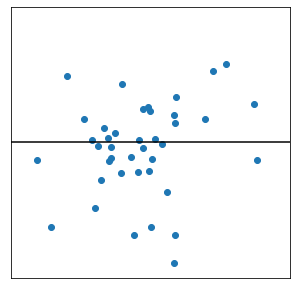

In [3]:
np.random.seed(2)
num = 40
fig = plt.figure(figsize=(5,5))
X = np.random.normal(loc = 0.5, scale = 0.5, size = num)
Y = np.random.normal(loc = 0.5, scale = 0.5, size = num)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.scatter(X,Y)
plt.xticks([])
plt.yticks([])
plt.hlines(0.5,-1,2,color = "black" )
plt.savefig("./results/plot/partition_11.pdf",bbox_inches="tight")


(-1.0, 2.0)

(-1.0, 2.0)

([], [])

([], [])

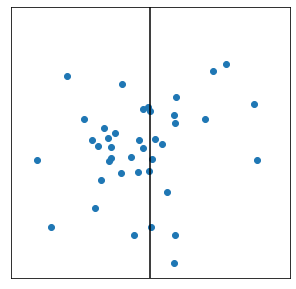

In [4]:
np.random.seed(2)
num = 40
fig = plt.figure(figsize=(5,5))
X = np.random.normal(loc = 0.5, scale = 0.5, size = num)
Y = np.random.normal(loc = 0.5, scale = 0.5, size = num)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.scatter(X,Y)
plt.xticks([])
plt.yticks([])
plt.vlines(0.5,-1,2,color = "black" )
plt.savefig("./results/plot/partition_12.pdf",bbox_inches="tight")

(-1.0, 2.0)

(-1.0, 2.0)

([], [])

([], [])

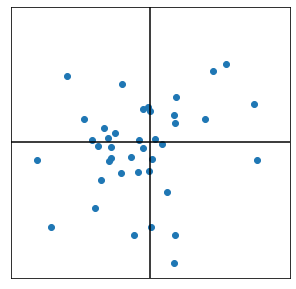

In [5]:
np.random.seed(2)
num = 40
fig = plt.figure(figsize=(5,5))
X = np.random.normal(loc = 0.5, scale = 0.5, size = num)
Y = np.random.normal(loc = 0.5, scale = 0.5, size = num)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.scatter(X,Y)
plt.xticks([])
plt.yticks([])
plt.vlines(0.5,-1,2,color = "black" )
plt.hlines(0.5,-1,2,color = "black" )
plt.savefig("./results/plot/partition_21.pdf",bbox_inches="tight")

(-1.0, 2.0)

(-1.0, 2.0)

([], [])

([], [])

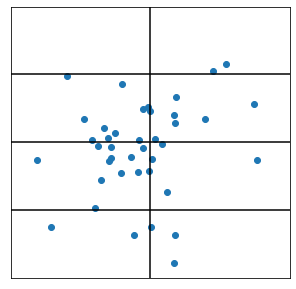

In [6]:
np.random.seed(2)
num = 40
fig = plt.figure(figsize=(5,5))
X = np.random.normal(loc = 0.5, scale = 0.5, size = num)
Y = np.random.normal(loc = 0.5, scale = 0.5, size = num)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.scatter(X,Y)
plt.xticks([])
plt.yticks([])
plt.vlines(0.5,-1,2,color = "black" )
plt.hlines(0.5,-1,2,color = "black" )

plt.hlines(-0.25,-1,0.5,color = "black" )
plt.hlines(1.25,0.5,2,color = "black" )
plt.hlines(-0.25,0.5,2,color = "black" )
plt.hlines(1.25,-1,0.5,color = "black" )
plt.savefig("./results/plot/partition_31.pdf",bbox_inches="tight")

(-1.0, 2.0)

(-1.0, 2.0)

([], [])

([], [])

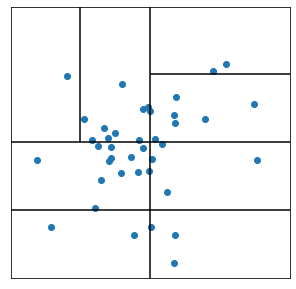

In [7]:
np.random.seed(2)
num = 40
fig = plt.figure(figsize=(5,5))
X = np.random.normal(loc = 0.5, scale = 0.5, size = num)
Y = np.random.normal(loc = 0.5, scale = 0.5, size = num)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.scatter(X,Y)
plt.xticks([])
plt.yticks([])
plt.vlines(0.5,-1,2,color = "black" )
plt.hlines(0.5,-1,2,color = "black" )

plt.hlines(-0.25,-1,0.5,color = "black" )
plt.hlines(1.25,0.5,2,color = "black" )
plt.hlines(-0.25,0.5,2,color = "black" )
plt.vlines(-0.25,0.5,2,color = "black" )
plt.savefig("./results/plot/partition_32.pdf",bbox_inches="tight")

(-1.0, 2.0)

(-1.0, 2.0)

([], [])

([], [])

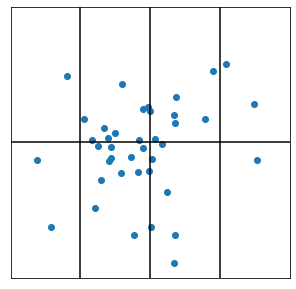

In [8]:
np.random.seed(2)
num = 40
fig = plt.figure(figsize=(5,5))
X = np.random.normal(loc = 0.5, scale = 0.5, size = num)
Y = np.random.normal(loc = 0.5, scale = 0.5, size = num)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.scatter(X,Y)
plt.xticks([])
plt.yticks([])
plt.vlines(0.5,-1,2,color = "black" )
plt.hlines(0.5,-1,2,color = "black" )

plt.vlines(-0.25,-1,0.5,color = "black" )
plt.vlines(1.25,0.5,2,color = "black" )
plt.vlines(1.25,-1,0.5,color = "black" )
plt.vlines(-0.25,0.5,2,color = "black" )

plt.savefig("./results/plot/partition_33.pdf",bbox_inches="tight")

## Distribution of Point Estimation

In [9]:
sample_generator=TestDistribution(8).returnDistribution()
n_test, n_train = 4000,2000
df = pd.DataFrame(columns=["extra_est","naive_est","est_type"])


test_point = np.array([[0.25,0.25]])

for i in range(50):
    np.random.seed(i)
    
    X_train, Y_train = sample_generator.generate(n_train)


    model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                             splitter="maxedge",
                             min_samples_split=3,
                             max_depth=4,
                             order=1,
                             random_state=4,
                             lamda = 0.005,
                              V=10,
                          r_range_low = 0.3,
                          r_range_up = 0.6)
    model.fit(X_train, Y_train)
    df = df.append({"est":model.predict(test_point).item(),"est_type":"RTER"}, ignore_index=True)



    model = RegressionTree(estimator="naive_estimator",
                             splitter="maxedge",
                             min_samples_split=3,
                             max_depth=5)
    model.fit(X_train, Y_train)
    

    df = df.append({"est":model.predict(test_point).item(),"est_type":"RTR"}, ignore_index=True)




<AxesSubplot:>

Text(0, 0.5, 'Estimation')

Text(0.5, 0, ' ')

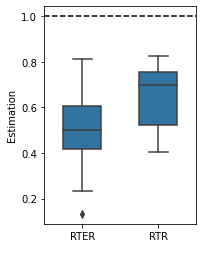

In [10]:
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
ax1 = sb.boxplot(data = df, x = 'est_type', y = 'est', color = base_color, width = 0.5)
plt.hlines(1,-0.5,1.5,linestyle = "--",color = "black")
plt.ylabel("Estimation")
plt.xlabel(" ")

## Linear Regression Plot

In [74]:
sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)



parameters= {"truncate_ratio_low":[0], "truncate_ratio_up":[1],
"min_samples_split":[5,10], "max_depth":[0,1,2,3,4,5],
"order":[2],"splitter":["maxedge"],
"estimator":["pointwise_extrapolation_estimator"],
"r_range_low":[0],"r_range_up":[0.5,0.7,0.9,1],
"step":[1],"lamda":[0.0001,0.001,0.01,0.1,0.2],"V":[5,8,10,15,20,25,30]}



cv_model_RTER=GridSearchCV(estimator=RegressionTree(),param_grid=parameters, cv=3, n_jobs=-1)
cv_model_RTER.fit(X_train, Y_train) ##############

cv_model_RTER.best_params_


GridSearchCV(cv=3,
             estimator=<RTER.tree.RegressionTree object at 0x7f1880e1b290>,
             n_jobs=-1,
             param_grid={'V': [5, 8, 10, 15, 20, 25, 30],
                         'estimator': ['pointwise_extrapolation_estimator'],
                         'lamda': [0.0001, 0.001, 0.01, 0.1, 0.2],
                         'max_depth': [0, 1, 2, 3, 4, 5],
                         'min_samples_split': [5, 10], 'order': [2],
                         'r_range_low': [0], 'r_range_up': [0.5, 0.7, 0.9, 1],
                         'splitter': ['maxedge'], 'step': [1],
                         'truncate_ratio_low': [0], 'truncate_ratio_up': [1]})

{'V': 5,
 'estimator': 'pointwise_extrapolation_estimator',
 'lamda': 0.1,
 'max_depth': 3,
 'min_samples_split': 5,
 'order': 2,
 'r_range_low': 0,
 'r_range_up': 1,
 'splitter': 'maxedge',
 'step': 1,
 'truncate_ratio_low': 0,
 'truncate_ratio_up': 1}

In [104]:
def plot_polynomial(beta,r):
    result = 0
    for idx_b, b in enumerate(beta.ravel()):
        result += r**idx_b * b
    return result



(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

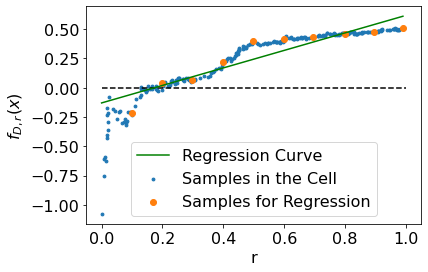

In [151]:

np.random.seed(3)

test_point = np.array([np.pi/8])


sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=3,
                         max_depth = 3,
                         order=1,
                         random_state=1,
                         lamda = 0.00001,
                          V=10,
                      r_range_low = 0,
                      r_range_up = 1)
model.fit(X_train, Y_train)

_ = model.score(X_test,Y_test)

pred_weights, all_r , all_y_hat  , used_r, used_y_hat = model.get_info(test_point.reshape(1,-1))


_=plt.scatter(all_r,all_y_hat,label = "Samples in the Cell",s=8)
_=plt.scatter(used_r, used_y_hat, label = "Samples for Regression")



r_arange = np.arange(0,1,0.01)
y_hat_regressed = np.array([plot_polynomial(pred_weights, r) for r in r_arange])

_= plt.plot(r_arange, y_hat_regressed,color = "green",label = "Regression Curve")

plt.hlines(sample_generator.evaluate(test_point.reshape(1,-1)).item(),0,1,linestyles = "--",color = "black")
#plt.plot(0,sample_generator.evaluate(test_point.reshape(1,-1)).item(), marker = "*",color = "red" )
#plt.plot(0,pred_weights[0,0], marker = '*', color ="blue")


_ = plt.xlabel("r",fontsize=16)
_ = plt.ylabel(r"$f_{D,r}(x)$",fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize = 16,loc = 8)

plt.savefig("./results/plot/regression_fig_2.pdf",bbox_inches="tight")


In [115]:
w_0 = [np.sum(np.array([np.any(all_r<r_threshold)/(np.sum(all_r<r_threshold)+1e-10) for r_threshold in used_r[i:]]) * np.ones(10)[i:]/10) for i in range(10)]

R_matrix = np.array([[r**j for j in range(1,1+1)] for r in used_r])
P_R = R_matrix @ np.linalg.inv(R_matrix.T @ R_matrix) @ R_matrix.T
Z = (np.ones(10) - np.ravel(P_R @ np.ones(10).reshape(-1,1)))/(10 - P_R.sum())
w_1 = [np.sum(np.array([np.any(all_r<r_threshold)/(np.sum(all_r<r_threshold)+1e-10) for r_threshold in used_r[i:]]) * Z[i:]) for i in range(10)]


R_matrix = np.array([[r**j for j in range(1,2+1)] for r in used_r])
P_R = R_matrix @ np.linalg.inv(R_matrix.T @ R_matrix) @ R_matrix.T
Z = (np.ones(10) - np.ravel(P_R @ np.ones(10).reshape(-1,1)))/(10 - P_R.sum())
w_2 = [np.sum(np.array([np.any(all_r<r_threshold)/(np.sum(all_r<r_threshold)+1e-10) for r_threshold in used_r[i:]]) * Z[i:]) for i in range(10)]




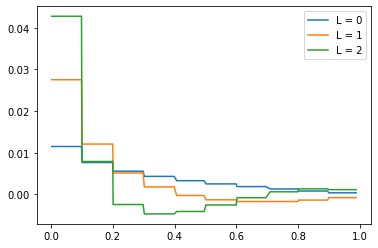

In [116]:
plt.plot(all_r, [w_0[np.sum(r>used_r)] for r in all_r],label = "L = 0")
plt.plot(all_r, [w_1[np.sum(r>used_r)] for r in all_r],label = "L = 1")
plt.plot(all_r, [w_2[np.sum(r>used_r)] for r in all_r],label = "L = 2")
plt.legend()

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

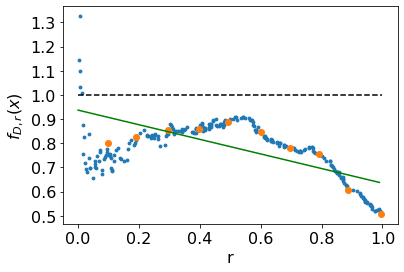

In [152]:

np.random.seed(3)

test_point = np.array([np.pi/8+np.pi/32])


sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=3,
                         max_depth = 3,
                         order=1,
                         random_state=1,
                         lamda = 1e-9,
                          V=10,
                      r_range_low = 0,
                      r_range_up = 1)
model.fit(X_train, Y_train)

_ = model.score(X_test,Y_test)

pred_weights, all_r , all_y_hat  , used_r, used_y_hat = model.get_info(test_point.reshape(1,-1))


_=plt.scatter(all_r,all_y_hat,label = "Samples in the Cell",s=8)
_=plt.scatter(used_r, used_y_hat, label = "Samples for Regression")



r_arange = np.arange(0,1,0.01)
y_hat_regressed = np.array([plot_polynomial(pred_weights, r) for r in r_arange])

_= plt.plot(r_arange, y_hat_regressed,color = "green",label = "Regression Curve")

plt.hlines(sample_generator.evaluate(test_point.reshape(1,-1)).item(),0,1,linestyles = "--",color = "black")
#plt.plot(0,sample_generator.evaluate(test_point.reshape(1,-1)).item(), marker = "*",color = "red" )
#plt.plot(0,pred_weights[0,0], marker = '*', color ="blue")


_ = plt.xlabel("r",fontsize=16)
_ = plt.ylabel(r"$f_{D,r}(x)$",fontsize=16)

#plt.legend(fontsize = 12,loc = 9)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("./results/plot/regression_fig_1.pdf",bbox_inches="tight")


In [102]:
w_0 = [np.sum(np.array([np.any(all_r<r_threshold)/(np.sum(all_r<r_threshold)+1e-10) for r_threshold in used_r[i:]]) * np.ones(10)[i:]/10) for i in range(10)]

R_matrix = np.array([[r**j for j in range(1,1+1)] for r in used_r])
P_R = R_matrix @ np.linalg.inv(R_matrix.T @ R_matrix) @ R_matrix.T
Z = (np.ones(10) - np.ravel(P_R @ np.ones(10).reshape(-1,1)))/(10 - P_R.sum())
w_1 = [np.sum(np.array([np.any(all_r<r_threshold)/(np.sum(all_r<r_threshold)+1e-10) for r_threshold in used_r[i:]]) * Z[i:]) for i in range(10)]


R_matrix = np.array([[r**j for j in range(1,2+1)] for r in used_r])
P_R = R_matrix @ np.linalg.inv(R_matrix.T @ R_matrix) @ R_matrix.T
Z = (np.ones(10) - np.ravel(P_R @ np.ones(10).reshape(-1,1)))/(10 - P_R.sum())
w_2 = [np.sum(np.array([np.any(all_r<r_threshold)/(np.sum(all_r<r_threshold)+1e-10) for r_threshold in used_r[i:]]) * Z[i:]) for i in range(10)]




(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

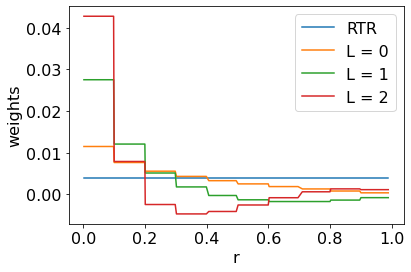

In [148]:
plt.plot(all_r, np.ones(all_r.shape[0])/all_r.shape[0],label = "RTR")
plt.plot(all_r, [w_0[np.sum(r>used_r)] for r in all_r],label = "L = 0")
plt.plot(all_r, [w_1[np.sum(r>used_r)] for r in all_r],label = "L = 1")
plt.plot(all_r, [w_2[np.sum(r>used_r)] for r in all_r],label = "L = 2")

_ = plt.xlabel("r",fontsize=16)
_ = plt.ylabel("weights",fontsize=16)

plt.legend(fontsize = 16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("./results/plot/interpretability.pdf",bbox_inches="tight")


-1.0197188470625127

Text(0.5203262832508095, 1, '($\\mathbf{5\\pi/32}$,1)')

Text(0.22269908169872413, 0.16666666666666666, '($\\mathbf{\\pi/8}$,$\\mathbf{0}$)')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(-1.5, 1.5)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

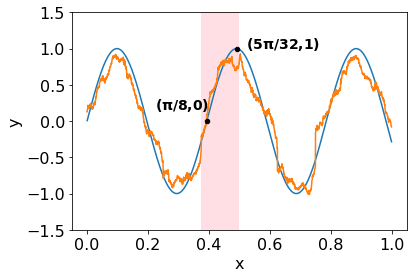

In [142]:

np.random.seed(3)



sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=3,
                         order=1,
                         random_state=4,
                         lamda = 0.5,
                          V=10,
                      r_range_low = 0,
                      r_range_up = 1)
model.fit(X_train, Y_train)

model.score(X_test,Y_test)

idx = np.argsort(X_test.ravel())

fig, ax = plt.subplots()


plt.plot(X_test.ravel()[idx],sample_generator.evaluate(X_test).ravel()[idx])
plt.plot(X_test.ravel()[idx],model.predict(X_test).ravel()[idx])

plt.scatter(np.pi/8+np.pi/16/2,1,s=20,color = "black",zorder=10)
plt.text(np.pi/8+np.pi*1.3/32,1, r"($\mathbf{5\pi/32}$,1)",fontsize=14, fontweight="bold")


plt.scatter(np.pi/8,0,s=20,color = "black",zorder=10)
plt.text(np.pi/8-0.17,1/6, r"($\mathbf{\pi/8}$,$\mathbf{0}$)",fontsize=14, fontweight="bold")
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16)
plt.ylim(-1.5,1.5)

rectangle=patches.Rectangle((0.375, -1.5), 0.125, 3,facecolor="pink",alpha=0.5)
ax.add_patch(rectangle)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("./results/plot/regression_fig_3.pdf",bbox_inches="tight")

## One Dimensional Visualization

In [153]:

np.random.seed(3)



sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)

model = RegressionTree(estimator="naive_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=3,
                         order=0,
                         random_state=4,
                         lamda = 1e-8,
                          V=25,
                      r_range_low = 0,
                      r_range_up = 1)
model.fit(X_train, Y_train)

model.score(X_test,Y_test)



-1.138712244789182

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(-1.6, 1.6)

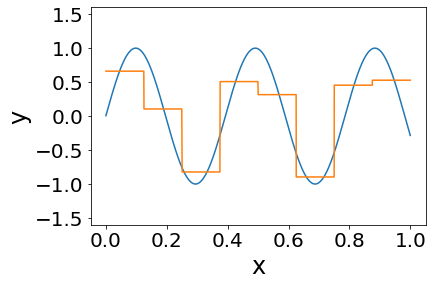

In [154]:
idx = np.argsort(X_test.ravel())
plt.plot(X_test.ravel()[idx],sample_generator.evaluate(X_test).ravel()[idx])
plt.plot(X_test.ravel()[idx],model.predict(X_test).ravel()[idx])
plt.xlabel("x",fontsize=24)
plt.ylabel("y",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1.6,1.6)
plt.savefig("./results/plot/smooth_RTR.pdf",bbox_inches="tight")

In [163]:

np.random.seed(3)



sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=3,
                         order=0,
                         random_state=4,
                         lamda = 1e-1,
                          V=25,
                      r_range_low = 0,
                      r_range_up = 1)
model.fit(X_train, Y_train)

model.score(X_test,Y_test)



-1.0393106444830287

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(-1.6, 1.6)

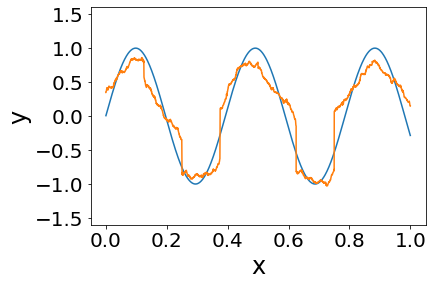

In [162]:
idx = np.argsort(X_test.ravel())
plt.plot(X_test.ravel()[idx],sample_generator.evaluate(X_test).ravel()[idx])
plt.plot(X_test.ravel()[idx],model.predict(X_test).ravel()[idx])
plt.xlabel("x",fontsize=24)
plt.ylabel("y",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1.6,1.6)
plt.savefig("./results/plot/smooth_0.pdf",bbox_inches="tight")

In [130]:

np.random.seed(2)



sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=3,
                         order=1,
                         random_state=4,
                         lamda = 1e-1,
                          V=25,
                      r_range_low = 0,
                      r_range_up = 1)
model.fit(X_train, Y_train)

model.score(X_test,Y_test)



-1.0223528463040912

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(-1.6, 1.6)

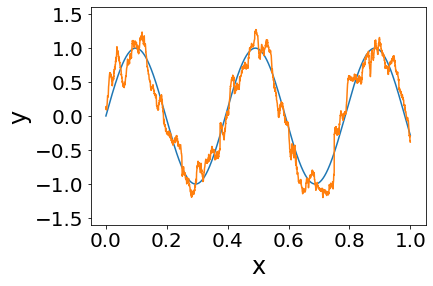

In [131]:
idx = np.argsort(X_test.ravel())
plt.plot(X_test.ravel()[idx],sample_generator.evaluate(X_test).ravel()[idx])
plt.plot(X_test.ravel()[idx],model.predict(X_test).ravel()[idx])
plt.xlabel("x",fontsize=24)
plt.ylabel("y",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1.6,1.6)
plt.savefig("./results/plot/smooth_1.pdf",bbox_inches="tight")

In [132]:

np.random.seed(5)



sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=3,
                         order=2,
                         random_state=4,
                         lamda = 1e-5,
                          V=25,
                      r_range_low = 0,
                      r_range_up = 1)
model.fit(X_train, Y_train)

model.score(X_test,Y_test)



-1.067685497849481

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(-1.6, 1.6)

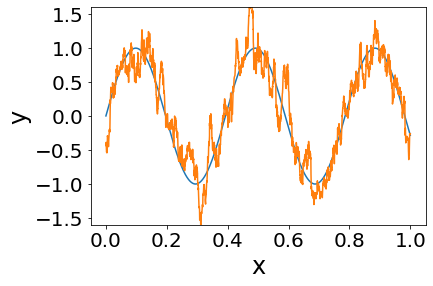

In [133]:
idx = np.argsort(X_test.ravel())
plt.plot(X_test.ravel()[idx],sample_generator.evaluate(X_test).ravel()[idx])
plt.plot(X_test.ravel()[idx],model.predict(X_test).ravel()[idx])
plt.xlabel("x",fontsize=24)
plt.ylabel("y",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1.6,1.6)
plt.savefig("./results/plot/smooth_2.pdf",bbox_inches="tight")

## Parameter Analysis for Depth

In [24]:
distribution_index_vec=[1]
repeat_time=20

optimal_result_dir = "./results/plot/optparams/"
log_file_name = "{}.csv".format("RTER_depth")
log_file_path = os.path.join(optimal_result_dir, log_file_name)
try:
    os.remove(log_file_path)
except:
    pass




for distribution_iter,distribution_index in enumerate(distribution_index_vec):
    for p in [1,2,3,4,5,6,7]:
        for order in [-1,0,1,2]:

            for iterate in range(repeat_time):

                np.random.seed(iterate)
                # generate distribution


                sample_generator=TestDistribution(distribution_index).returnDistribution()
                n_test, n_train = 3000,1000
                X_train, Y_train = sample_generator.generate(n_train)
                X_test, Y_test = sample_generator.generate(n_test)


                   # RTER 
                if order == -1:
                    
                    time_start=time()
                    parameters= {"truncate_ratio_low":[0], "truncate_ratio_up":[1],
                   "min_samples_split":[5], 'max_depth':[p],
                   "order":[order],"splitter":["maxedge"],
                    "estimator":["naive_estimator"],
                   "r_range_low":[0],"r_range_up":[1],
                   "step":[1],"lamda":[0],"V":[10]}

                    #print(parameters)

                    cv_model_RTER=GridSearchCV(estimator=RegressionTree(),param_grid=parameters, cv=3, n_jobs=-1)
                    _=cv_model_RTER.fit(X_train, Y_train) ##############
                    RTER_model = cv_model_RTER.best_estimator_
                    mse_score=-RTER_model.score(X_test, Y_test)
                    RTER_bestparams = cv_model_RTER.best_params_
                    #print('RTER_model params best: ', RTER_bestparams)        
                    time_end=time()
                else:
                    time_start=time()
                    parameters= {"truncate_ratio_low":[0], "truncate_ratio_up":[1],
                   "min_samples_split":[5], 'max_depth':[p],
                   "order":[order],"splitter":["maxedge"],
                    "estimator":["pointwise_extrapolation_estimator"],
                   "r_range_low":[0],"r_range_up":[1],
                   "step":[1],"lamda":[0.001,0.01],"V":[15,20,25,30]}

                    #print(parameters)

                    cv_model_RTER=GridSearchCV(estimator=RegressionTree(),param_grid=parameters, cv=3, n_jobs=-1)
                    _=cv_model_RTER.fit(X_train, Y_train) ##############
                    RTER_model = cv_model_RTER.best_estimator_
                    mse_score=-RTER_model.score(X_test, Y_test)
                    RTER_bestparams = cv_model_RTER.best_params_
                    #print('RTER_model params best: ', RTER_bestparams)        
                    time_end=time()



                with open(log_file_path, "a") as f:
                    logs= "{},{},{},{},{}\n".format(distribution_index,
                                                    mse_score, time_end-time_start,
                                                    iterate, RTER_bestparams)
                    f.writelines(logs)


In [143]:
df = pd.read_csv(optimal_result_dir +'RTER_depth.csv',header=None)
for i in range(4,15):
    temp = df.loc[:,i].str.split(':',expand =True)
    #print(temp.loc[1,0])
    df.loc[:,i] = temp.loc[:,1].map(lambda x: x.lstrip('{\'}').rstrip('} \'').lstrip('\'\ '))
    df.rename(columns={i:((temp.loc[1,0].strip('{\'}')).lstrip('\'\ '))},inplace=True)
df.rename(columns={0:'distribution',1:'MSE',2:'time',3:'repeat'},inplace=True)
dfp = df.groupby(by=["max_depth","order"]).agg('mean').reset_index()

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'MSE')

Text(0.5, 0, '$p$')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

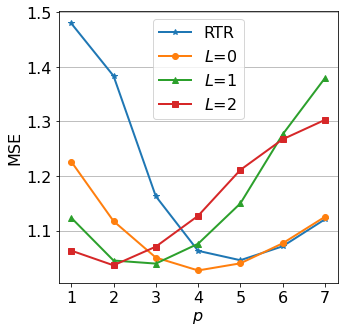

In [144]:
plt.figure(figsize=(5,5))
x = dfp['max_depth'][dfp["order"]=="-1"]
y = dfp['MSE'][dfp["order"]=="-1"]
plt.plot(x,y,linewidth=2,label='RTR',marker = "*")

x = dfp['max_depth'][dfp["order"]=="0"]
y = dfp['MSE'][dfp["order"]=="0"]
plt.plot(x,y,linewidth=2,label=r'$L$=0',marker = "o")

x = dfp['max_depth'][dfp["order"]=="1"]
y = dfp['MSE'][dfp["order"]=="1"]
plt.plot(x,y,linewidth=2,label=r'$L$=1',marker = "^")

x = dfp['max_depth'][dfp["order"]=="2"]
y = dfp['MSE'][dfp["order"]=="2"]
plt.plot(x,y,linewidth=2,label=r'$L$=2',marker = "s")


plt.ylabel("MSE",fontsize=16)
plt.xlabel(r"$p$",fontsize=16)
plt.legend(fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y')
plt.savefig("./results/plot/RTER_depth.pdf",bbox_inches="tight")

## Parameter Analysis for Order

In [27]:
distribution_index_vec=[1]
repeat_time=20

optimal_result_dir = "./results/plot/optparams/"
log_file_name = "{}.csv".format("RTER_order")
log_file_path = os.path.join(optimal_result_dir, log_file_name)
try:
    os.remove(log_file_path)
except:
    pass




for distribution_iter,distribution_index in enumerate(distribution_index_vec):
    for p in [1,2,3]:
        for order in [0,1,2,3,4]:

            for iterate in range(repeat_time):

                np.random.seed(iterate)
                # generate distribution


                sample_generator=TestDistribution(distribution_index).returnDistribution()
                n_test, n_train = 3000,1000
                X_train, Y_train = sample_generator.generate(n_train)
                X_test, Y_test = sample_generator.generate(n_test)


                   # RTER 
                time_start=time()
                parameters= {"truncate_ratio_low":[0], "truncate_ratio_up":[1],
               "min_samples_split":[5], 'max_depth':[p],
               "order":[order],"splitter":["maxedge"],
                "estimator":["pointwise_extrapolation_estimator"],
               "r_range_low":[0],"r_range_up":[1],
               "step":[1],"lamda":[0.00001],"V":[15,20,25,30]}
                
                #print(parameters)

                cv_model_RTER=GridSearchCV(estimator=RegressionTree(parallel_jobs=0),param_grid=parameters, cv=3, n_jobs=-1)
                _=cv_model_RTER.fit(X_train, Y_train) ##############
                RTER_model = cv_model_RTER.best_estimator_
                mse_score=-RTER_model.score(X_test, Y_test)
                RTER_bestparams = cv_model_RTER.best_params_
                #print('RTER_model params best: ', RTER_bestparams)        
                time_end=time()



                with open(log_file_path, "a") as f:
                    logs= "{},{},{},{},{}\n".format(distribution_index,
                                                    mse_score, time_end-time_start,
                                                    iterate, RTER_bestparams)
                    f.writelines(logs)


In [145]:
df = pd.read_csv(optimal_result_dir +'RTER_order.csv',header=None)
for i in range(4,15):
    temp = df.loc[:,i].str.split(':',expand =True)
    #print(temp.loc[1,0])
    df.loc[:,i] = temp.loc[:,1].map(lambda x: x.lstrip('{\'}').rstrip('} \'').lstrip('\'\ '))
    df.rename(columns={i:((temp.loc[1,0].strip('{\'}')).lstrip('\'\ '))},inplace=True)
df.rename(columns={0:'distribution',1:'MSE',2:'time',3:'repeat'},inplace=True)
dfp = df.groupby(by=["max_depth","order"]).agg('mean').reset_index()

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'MSE')

Text(0.5, 0, '$L$')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([1.025, 1.05 , 1.075, 1.1  , 1.125, 1.15 , 1.175, 1.2  , 1.225,
        1.25 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

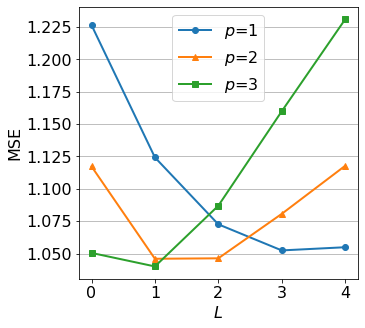

In [147]:
plt.figure(figsize=(5,5))
x = dfp['order'][dfp["max_depth"]=="1"]
y = dfp['MSE'][dfp["max_depth"]=="1"]
plt.plot(x,y,linewidth=2,label=r'$p$=1',marker = "o")

x = dfp['order'][dfp["max_depth"]=="2"]
y = dfp['MSE'][dfp["max_depth"]=="2"]
plt.plot(x,y,linewidth=2,label=r'$p$=2',marker = "^")

x = dfp['order'][dfp["max_depth"]=="3"]
y = dfp['MSE'][dfp["max_depth"]=="3"]
plt.plot(x,y,linewidth=2,label=r'$p$=3',marker = "s")


plt.ylabel("MSE",fontsize=16)
plt.xlabel(r"$L$",fontsize=16)
plt.legend(fontsize = 16)
plt.grid(axis='y')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("./results/plot/RTER_order.pdf",bbox_inches="tight")